In [21]:
import pandas as pd
import numpy as np
from tqdm import tqdm_notebook
from kaggle_util import *
from ship_mrcnn import *
from sklearn.metrics import roc_auc_score, roc_curve, log_loss, f1_score
import os
import shutil
from tqdm import tqdm_notebook
from sklearn.model_selection import KFold, StratifiedKFold

%matplotlib inline

In [8]:
oof = pd.read_csv('../result/oof_coco_ship_.csv')
train_result = pd.read_csv('../input/train_ship_segmentations.csv.zip')

pd_imgs = pd.DataFrame({'ImageId':oof.ImageId.unique()})

train_fact = merge_ship(pd_imgs, train_result, 'act_ship')
train_fact = merge_ship(train_fact, oof, 'oof_ship')

In [9]:
train_fact.loc

,ImageId,act_ship,act_ship_cnt,oof_ship,oof_ship_cnt
0,00003e153.jpg,0,0,0,0
1,000155de5.jpg,1,1,1,1
2,00021ddc3.jpg,1,9,1,5
3,0002756f7.jpg,1,2,1,1
4,0002d0f32.jpg,0,0,0,0


In [13]:
wrong_imgs = train_fact.loc[train_fact.act_ship_cnt != train_fact.oof_ship_cnt]

In [19]:


prog = tqdm_notebook(total = wrong_imgs.shape[0])
for idx, row in wrong_imgs.iterrows():
    path = '../input/all/{}'.format(row.ImageId)
    if os.path.exists(path):
        shutil.copy(path, '../input/wrong/')
    prog.update(1)

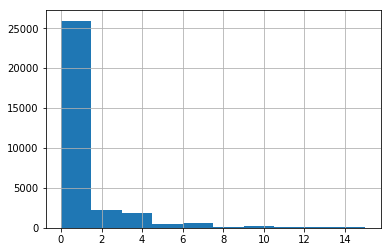

In [20]:
wrong_imgs.act_ship_cnt.hist()

In [23]:
folds = StratifiedKFold(n_splits= 50, shuffle=True, random_state=1001)
train_idx, valid_idx = next(folds.split(wrong_imgs, wrong_imgs.act_ship_cnt))

val_df = wrong_imgs.iloc[valid_idx]
print(val_df.shape)

(640, 5)


/home/kownse/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 42 members, which is too few. The minimum number of members in any class cannot be less than n_splits=50.
  % (min_groups, self.n_splits)), Warning)


In [25]:
prog = tqdm_notebook(total = val_df.shape[0])
for idx, row in val_df.iterrows():
    path = '../input/wrong/{}'.format(row.ImageId)
    if os.path.exists(path):
        shutil.move(path, '../input/wrong_val/')
    prog.update(1)